<center><img src="https://universodiscreto.com/circle-ud.png"/></center>

# Desenho e Animação com Círculo e Elipse

Nesse notebook serão inseridos exemplos que foram discutidos no vídeo abaixo: 

[<img src="http://i3.ytimg.com/vi/A652qZ9r9GY/maxresdefault.jpg" width="50%">](https://youtu.be/A652qZ9r9GY)

In [13]:
import os

def convert_avi_to_file(avi_file_path, output_file):
    os.system("ffmpeg -i " + avi_file_path + " " + output_file)

In [14]:
import cv2
import numpy as np

BLUE = (255, 0, 0)
RED = (0, 0, 255)
WHITE = (255, 255, 255)

In [15]:
def showImage(img):
    from matplotlib import pyplot as plt
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [16]:
def drawCircle(img, color):
    centerCoordinates = (200, 200)
    
    radius = 24
    
    cv2.circle(img,
               centerCoordinates,
               radius,
               color,
               -1)

In [17]:
def drawEllipse(img, angleEllipse, angleStart, angleEnd, color, thickness):
    centerCoordinates = (200, 200)
    axesLength = (200, 50)

    cv2.ellipse(img,
                centerCoordinates,
                axesLength,
                angleEllipse,
                angleStart,
                angleEnd,
                color,
                thickness)

## Desenho Simples da Estrutura do Átomo

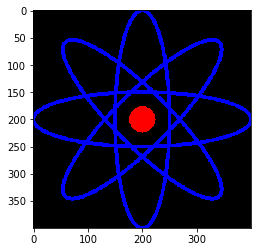

In [6]:
atomImageWithoutElectrons = np.zeros((400, 400, 3), dtype=np.uint8)
drawEllipse(atomImageWithoutElectrons, 90, 0, 360, BLUE, 5)
drawEllipse(atomImageWithoutElectrons, 0, 0, 360, BLUE, 5)
drawEllipse(atomImageWithoutElectrons, 45, 0, 360, BLUE, 5)
drawEllipse(atomImageWithoutElectrons, 135, 0, 360, BLUE, 5)
drawCircle(atomImageWithoutElectrons, RED)

showImage(atomImageWithoutElectrons)

## GIF Animado da Estrutura do Átomo

In [18]:
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
out = cv2.VideoWriter('atom.avi', fourcc, 20.0, (400, 400))
frames = 0

angleElectron1 = 0
angleElectron2 = 40
angleElectron3 = 80
while(angleElectron1 <= 360):
    atomImageCopy = atomImageWithoutElectrons.copy()
    drawEllipse(atomImageCopy, 45, angleElectron1, angleElectron1 + 5, WHITE, 15)
    drawEllipse(atomImageCopy, 90, angleElectron2, angleElectron2 + 5, WHITE, 15)
    drawEllipse(atomImageCopy, 135, angleElectron3, angleElectron3 + 5, WHITE, 15)
    
    angleElectron1 += 15
    angleElectron2 += 15
    angleElectron3 += 15
    
    out.write(atomImageCopy)
    frames += 1
    
out.release()

In [19]:
if os.path.exists("atom.gif"):
    os.remove("atom.gif")
    
convert_avi_to_file(os. getcwd() + "\\atom.avi", "atom.gif")

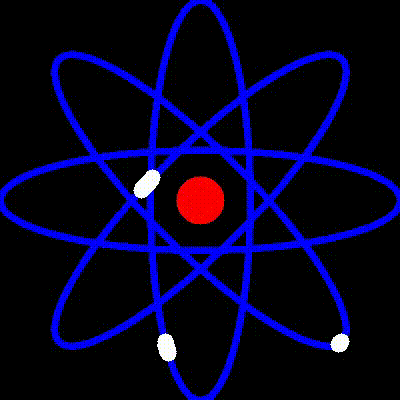

In [20]:
from IPython.display import Image

Image(filename="atom.gif")